In [1]:
import numpy as np

from astropaint import Canvas
from astropaint.lib import utils

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(8,6)

# np.random.seed(0)

import healpy as hp
from timeit import default_timer as timer

In [2]:
lmax = 2
L, CMB_Cl = utils.get_CMB_Cl(lmax, mode="TT", return_ell=True, uK=True)

/Users/zhaozihan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Attempting to set identical left == right == 2 results in singular transformations; automatically expanding.
  import sys


(1.0, 10.0)

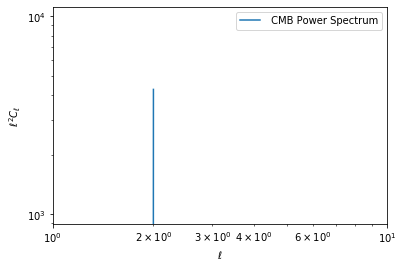

In [3]:
plt.loglog(L, L**2*CMB_Cl, label =" CMB Power Spectrum")

plt.ylabel("$\ell^2 C_\ell$")
plt.xlabel("$\ell$")

plt.legend()
plt.xlim(2,lmax)

In [4]:
nside = 2048 
canvas = Canvas(None,nside)

Building the dataframe and updating all the parameters...

Done!


In [5]:
CMB_Cl

array([   0.        ,    0.        , 1068.62138584])

In [6]:
a_2_m_list = [-22.58993606070185-33.61576703365145j,-43.16890462360173+3.329590415871157j, 31.994724311127225+0j, 43.16890462360173+3.329590415871157j, -22.58993606070185+33.61576703365145j]
total = sum([np.square(abs(item)) for item in a_2_m_list])
total/5


1610.7186780395707

In [9]:
canvas.add_cmb(Cl=CMB_Cl)

CMBAlreadyAdded: CMB has been already added. You can remove it using canvas.remove_cmb()

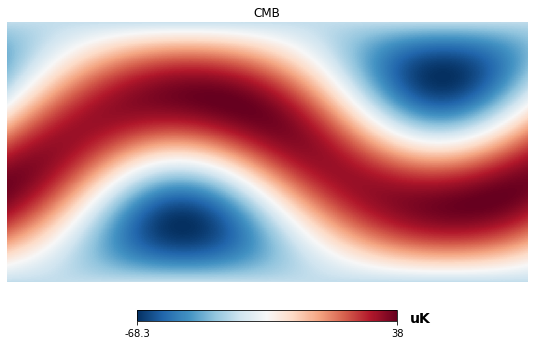

In [11]:
canvas.show_map("cart",
               title="CMB",
               unit="uK")

In [15]:
canvas.alm

KeyboardInterrupt: 

In [ ]:
a2m_list = []
for alm in canvas.alm:
    if alm.real > 0.000001 or alm.imag > 0.000001:
        a2m_list.append(alm)

In [ ]:
a2m_list

In [ ]:
len(canvas.alm)

In [ ]:
hp.sphtfunc.map2alm(canvas.pixels, lmax=2, mmax=2, iter=3, pol=True, use_weights=False, datapath=None)

In [37]:
canvas.cmap

In [39]:
canvas.pixels

array([20.1643704 , 20.20198543, 20.19907659, ..., 20.16147807,
       20.1643704 , 20.20198543])

In [48]:
hp.sphtfunc.map2alm(canvas.pixels, lmax=1, mmax=None, iter=3, pol=True, use_weights=False, datapath=None)

array([-7.89677460e-07+0.00000000e+00j, -1.91380522e-15+0.00000000e+00j,
        8.12135670e-16-6.84422277e-16j])

In [16]:
hp.synalm(CMB_Cl, lmax = 2)

array([ 0.         +0.j        ,  0.         +0.j        ,
       14.50978918 +0.j        ,  0.         +0.j        ,
       34.53587913+19.98158238j, -4.74226641-17.15526433j])

In [8]:
#write a function using the index to extract alm
def get_alm_from_array(array, lmax, l, m):
    def get_index(lmax, l, m):
        if m > 0:
            index = sum([lmax - i + 1 for i in range(m)]) + (l - m)
            return index
        elif m >l:
            return "invalid input: m>l"
        else:
            return l
    index = get_index(lmax, l, m)
    return array[index]

In [9]:
start = timer()
get_alm_from_array(canvas.alm, 6143, 2,1)
end = timer()
print(end - start)

alms saved in canvas.alm
109.89377716399999


In [13]:
get_alm_from_array(canvas.alm, 6143, 2,1)

(43.16890462360173+3.329590415871157j)

In [1]:
lmax = 0
while sum([lmax - i + 1 for i in range(lmax + 1)]) != 18877440:
    lmax += 1
lmax

6143